

# Number 3: Columns Joins 

You have two datasets:

* An Excel document of obesity rates, called `obesity.xlsx`
* A shapefile of US states from the [Census Burea](https://www.census.gov/geo/maps-data/data/tiger-cart-boundary.html), unzipped into `cb_2016_us_state_500k/`

You're going to make a choropleth of obesity rates in US states.

**MAKE SURE YOU HAVE COMPLETED PART TWO BEFORE YOU DO THIS ONE.**

## Part Zero: Import what you need

I'm not giving you any more hints!

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline


## Part One: Opening your datasets

**Open up both files!** Think about what kind of file each one is before you try to open it.

In [2]:
states = gpd.read_file('/Users/kaitlincough/Documents/Lede/soma/14-classwork-part-2/cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states = states.to_crs(epsg=4326) 

states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [3]:
obesity = pd.read_excel('/Users/kaitlincough/Documents/Lede/soma/13-homework/obesity.xlsx')

obesity.head()
# points = obesity.apple(lambda row: Point(row.))
# #apply the function to the lat/lon rows to make each thing into a point
# points = galleries.apply(lambda row: Point(row.longitude, row.latitude), axis=1)

# #make it into a geodataframe
# galleries = gpd.GeoDataFrame(galleries, geometry=points)

# #set the CRS
# galleries.crs = {'init': 'epsg:4326'} #NOTE this is setting the CRS when there ISNT one

# galleries.head()

,statename,pct
0,Alabama,31.1
1,Alaska,27.7
2,Arizona,24.4
3,Arkansas,33.2
4,California,22.2


## Part Two: Map the states, just for fun

To double-check that the states look okay, make a quick map of them.

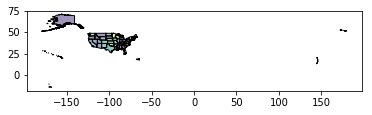

In [4]:
states.plot()

Uh, well, let's just stick to the continental Uninted States for now. An easy way to do this is by creating a **bounding box** and filtering out the ones that aren't inside.

I like to use [this dumb site](https://itouchmap.com/latlong.html) to find the latitude and longitude of specific points, but if I'm just trying to figure out a box I use [geojson.io](http://geojson.io/) and just... draw a box and see what it tells me.

For example, down below I am only selecting **the northeast**. I got the boundaries by drawing a box on geojson.io. We also use our good friend **`.within`** from last time to say hey states, which ones of you are inside of the boundary box?

In [5]:
from shapely.geometry import Polygon

bounds = [
            [
              -80.68359375,
              37.75334401310656
            ],
            [
              -65.91796875,
              37.75334401310656
            ],
            [
              -65.91796875,
              48.37084770238366
            ],
            [
              -80.68359375,
              48.37084770238366
            ],
            [
              -80.68359375,
              37.75334401310656
            ]
]

# Turn the coordinates into a shapely polygon
northeast_box = Polygon(bounds)

# Make sure our state CRS is in lat/lng by using to_crs
# You could also just have done
# states = states.to_crs({'init': 'epsg:4326'})
# and converted it permanently once instead of doing it multiple times later on
states.within(northeast_box).head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9    False
dtype: bool

And of course we can take those `True` and `False` values and feed them back into `states` to only get the states we're interested in. I plot them below, but you could always save them to a variable instead!

In [6]:
northeast = states[states.to_crs({'init': 'epsg:4326'}).within(northeast_box)]

## Part Three: Filter your states

So *I* selected only states in the northeast. Now it's your job to use that new skill to **filter out any states that aren't in the continental USA.**

In [7]:
bounds =  [
          [
            -125.41992187499999,
            48.922499263758255
          ],
          [
            -122.78320312499999,
            49.61070993807422
          ],
          [
            -89.296875,
            49.66762782262194
          ],
          [
            -81.2109375,
            45.089035564831036
          ],
          [
            -82.265625,
            42.032974332441405
          ],
          [
            -76.11328125,
            45.89000815866184
          ],
          [
            -72.158203125,
            45.767522962149876
          ],
          [
            -69.697265625,
            47.635783590864854
          ],
          [
            -67.67578124999999,
            47.87214396888731
          ],
          [
            -66.4453125,
            44.715513732021336
          ],
          [
            -70.13671875,
            42.74701217318067
          ],
          [
            -69.521484375,
            41.31082388091818
          ],
          [
            -73.30078125,
            39.842286020743394
          ],
          [
            -75.234375,
            36.80928470205937
          ],
          [
            -75.05859375,
            35.31736632923788
          ],
          [
            -81.2109375,
            30.751277776257812
          ],
          [
            -79.453125,
            26.03704188651584
          ],
          [
            -80.5078125,
            24.5271348225978
          ],
          [
            -82.265625,
            25.24469595130604
          ],
          [
            -83.75976562499999,
            27.371767300523047
          ],
          [
            -83.671875,
            28.92163128242129
          ],
          [
            -88.59374999999999,
            29.38217507514529
          ],
          [
            -94.833984375,
            28.38173504322308
          ],
          [
            -96.50390625,
            27.527758206861886
          ],
          [
            -96.328125,
            25.48295117535531
          ],
          [
            -99.140625,
            25.720735134412106
          ],
          [
            -100.986328125,
            27.527758206861886
          ],
          [
            -101.6015625,
            28.536274512989916
          ],
          [
            -104.58984375,
            28.459033019728043
          ],
          [
            -105.732421875,
            29.99300228455108
          ],
          [
            -106.962890625,
            30.977609093348686
          ],
          [
            -109.6875,
            30.675715404167743
          ],
          [
            -117.50976562499999,
            32.175612478499325
          ],
          [
            -124.01367187499999,
            36.94989178681327
          ],
          [
            -124.8046875,
            39.90973623453719
          ],
          [
            -125.15625000000001,
            41.705728515237524
          ],
          [
            -124.98046874999999,
            46.558860303117164
          ],
          [
            -125.33203125,
            48.574789910928864
          ]
        ]
continental_box = Polygon(bounds)
states.within(continental_box).head(10)

0     True
1    False
2     True
3     True
4    False
5     True
6     True
7     True
8     True
9     True
dtype: bool

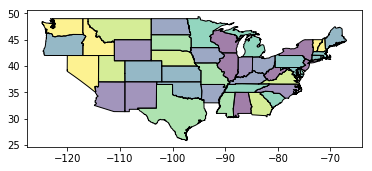

In [8]:
continental = states[states.to_crs({'init': 'epsg:4326'}).within(continental_box)].plot()

## Part Four: Joining your data

You have some obesity data, it looks like this:

In [9]:
obesity.head(3)

,statename,pct
0,Alabama,31.1
1,Alaska,27.7
2,Arizona,24.4


You have some states, they look like this:

In [10]:
states.head(3)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."


You need to **merge them together** using [merge](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html), which is just a normal pandas thing we've done before.

**THIS IS NOT A SPATIAL JOIN.** We're just saying hey, you guys both have columns that match, right? You might want to get together.

All `.merge` needs is two dataframes and a `left_on`/`right_on` to specify which columns to match up. Unlike a spatial join, for most column joins it doesn't matter which one is "left" and which one is "right."

In [13]:
df = states.merge(obesity, right_on='statename',left_on='NAME')
df.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,statename,pct
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",Alabama,31.1
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",Alaska,27.7
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",Arizona,24.4
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",Arkansas,33.2
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",California,22.2


## Part Five: Mapping your data

Map it. Familiar projection, nice large size, etc. Use a [nice color map](https://matplotlib.org/examples/color/colormaps_reference.html) that makes sense.

The one below is Mercator - you can see the grumpy top of the USA - see if you can make it something better! Maybe find the EPSG code for an Albers Equal Area that's good for the continental United States?

(-5592797.9994889107,
 214463.68462441687,
 11589727.179367775,
 20383171.879435759)

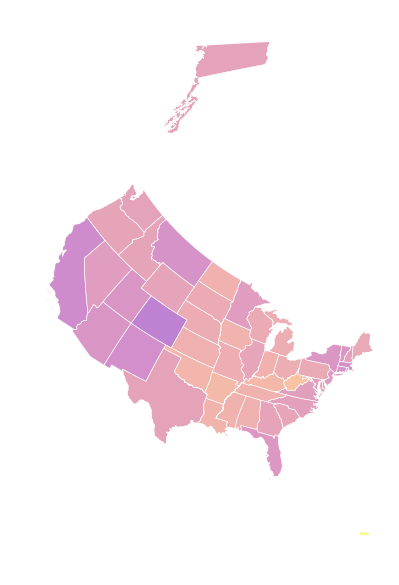

In [18]:
ax = df.to_crs({'init':'epsg:6703'}).plot(figsize=(25,10), linewidth=0.5, column='pct', cmap='plasma', edgecolor='white')
ax.axis('off')

# http://matplotlib.org/api/pyplot_summary.html

To get a different look, try passing `legend=True` and `scheme='Quantiles'`.

(-5592797.9994889107,
 214463.68462441687,
 11589727.179367775,
 20383171.879435759)

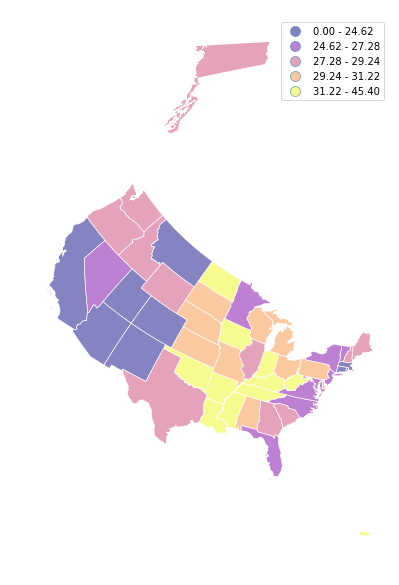

In [19]:
ax = df.to_crs({'init':'epsg:6703'}).plot(figsize=(25,10), linewidth=0.5, column='pct', cmap='plasma', edgecolor='white', legend=True, scheme='Quantiles')
ax.axis('off')

And oooone more time with `legend=True` and `scheme='equal_interval'`

(-5592797.9994889107,
 214463.68462441687,
 11589727.179367775,
 20383171.879435759)

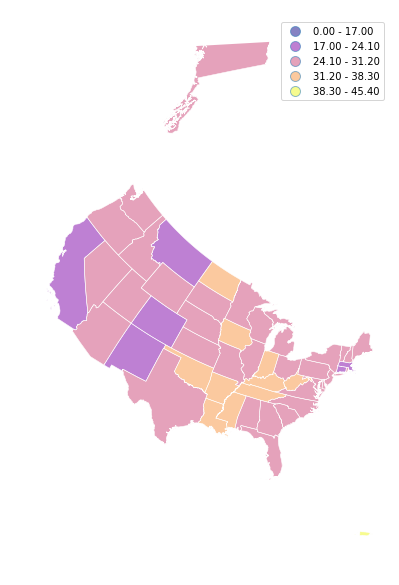

In [20]:
ax = df.to_crs({'init':'epsg:6703'}).plot(figsize=(25,10), linewidth=0.5, column='pct', cmap='plasma', edgecolor='white', legend=True, scheme='equal_interval')
ax.axis('off')

## Think about which one does the best job telling the story.

We'll talk about this next class.